In [23]:
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm

Data = pd.read_excel('data2.xlsx', index_col = 0).T

In [24]:
Data

,소비자물가,- 농축수산물,- 공업제품,- 집세,- 공공서비스,- 개인서비스,근원물가,생활물가,수출,(전년동월대비 수출 증감률),수입,(전년동월대비 수입 증감률),무역수지
1995\n01월,5.2,7.5,1.8,3.6,10.0,8.2,4.6,-,78,28.0,90,19.0,-12
1995\n02월,4.5,6.0,1.8,3.3,8.7,7.0,4.0,-,84,35.9,99,47.6,-15
1995\n03월,4.6,6.7,2.2,3.4,7.6,7.1,4.1,-,100,31.3,117,40.3,-17
1995\n04월,5.1,8.0,2.2,3.6,8.9,7.6,4.5,-,102,32.5,111,37.5,-9
1995\n05월,5.2,6.8,2.7,3.9,9.1,7.5,4.5,-,106,35.5,118,39.7,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023\n01월,5.2,1.1,6.0,1.3,0.8,5.9,5.0,6.1,464.0,-16.4,589.0,-2.8,-125.0
2023\n02월,4.8,1.1,5.1,1.1,0.9,5.7,4.8,5.5,500.0,-7.7,553.0,3.5,-53.0
2023\n03월,4.2,3.0,2.9,0.9,1.2,5.8,4.8,4.4,550.0,-13.8,597.0,-6.5,-47.0
2023\n04월,3.7,1.0,2.0,0.8,1.0,6.1,4.6,3.7,495.0,-14.4,522.0,-13.3,-27.0


In [25]:
Data.index = pd.date_range(start = '1995-01-01', end = '2023-06-01', freq = 'M')

In [26]:
Data

,소비자물가,- 농축수산물,- 공업제품,- 집세,- 공공서비스,- 개인서비스,근원물가,생활물가,수출,(전년동월대비 수출 증감률),수입,(전년동월대비 수입 증감률),무역수지
1995-01-31,5.2,7.5,1.8,3.6,10.0,8.2,4.6,-,78,28.0,90,19.0,-12
1995-02-28,4.5,6.0,1.8,3.3,8.7,7.0,4.0,-,84,35.9,99,47.6,-15
1995-03-31,4.6,6.7,2.2,3.4,7.6,7.1,4.1,-,100,31.3,117,40.3,-17
1995-04-30,5.1,8.0,2.2,3.6,8.9,7.6,4.5,-,102,32.5,111,37.5,-9
1995-05-31,5.2,6.8,2.7,3.9,9.1,7.5,4.5,-,106,35.5,118,39.7,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,5.2,1.1,6.0,1.3,0.8,5.9,5.0,6.1,464.0,-16.4,589.0,-2.8,-125.0
2023-02-28,4.8,1.1,5.1,1.1,0.9,5.7,4.8,5.5,500.0,-7.7,553.0,3.5,-53.0
2023-03-31,4.2,3.0,2.9,0.9,1.2,5.8,4.8,4.4,550.0,-13.8,597.0,-6.5,-47.0
2023-04-30,3.7,1.0,2.0,0.8,1.0,6.1,4.6,3.7,495.0,-14.4,522.0,-13.3,-27.0


In [27]:
df = Data.iloc[:,[0,-4,-2]]

In [28]:
df = df.astype(float) * 0.01

In [29]:
df

,소비자물가,(전년동월대비 수출 증감률),(전년동월대비 수입 증감률)
1995-01-31,0.052,0.280,0.190
1995-02-28,0.045,0.359,0.476
1995-03-31,0.046,0.313,0.403
1995-04-30,0.051,0.325,0.375
1995-05-31,0.052,0.355,0.397
...,...,...,...
2023-01-31,0.052,-0.164,-0.028
2023-02-28,0.048,-0.077,0.035
2023-03-31,0.042,-0.138,-0.065
2023-04-30,0.037,-0.144,-0.133


In [30]:
df.columns = ['CPI','export','import']

In [31]:
df['label'] = np.nan

In [32]:
df

,CPI,export,import,label
1995-01-31,0.052,0.280,0.190,NaN
1995-02-28,0.045,0.359,0.476,NaN
1995-03-31,0.046,0.313,0.403,NaN
1995-04-30,0.051,0.325,0.375,NaN
1995-05-31,0.052,0.355,0.397,NaN
...,...,...,...,...
2023-01-31,0.052,-0.164,-0.028,NaN
2023-02-28,0.048,-0.077,0.035,NaN
2023-03-31,0.042,-0.138,-0.065,NaN
2023-04-30,0.037,-0.144,-0.133,NaN


In [33]:
df.loc[(df['CPI'] < 0.04) & (df['import'] > 0), 'label'] = 1 # 호황기
df.loc[(df['CPI'] < 0.04) & (df['import'] <= 0), 'label'] = 2 # 후퇴기
df.loc[(df['CPI'] >= 0.04) & (df['import'] > 0), 'label'] = 0 # 회복기
df.loc[(df['CPI'] >= 0.04) & (df['import'] <= 0), 'label'] = 3 # 불경기

In [34]:
df

,CPI,export,import,label
1995-01-31,0.052,0.280,0.190,0.0
1995-02-28,0.045,0.359,0.476,0.0
1995-03-31,0.046,0.313,0.403,0.0
1995-04-30,0.051,0.325,0.375,0.0
1995-05-31,0.052,0.355,0.397,0.0
...,...,...,...,...
2023-01-31,0.052,-0.164,-0.028,3.0
2023-02-28,0.048,-0.077,0.035,0.0
2023-03-31,0.042,-0.138,-0.065,3.0
2023-04-30,0.037,-0.144,-0.133,2.0


<AxesSubplot:>

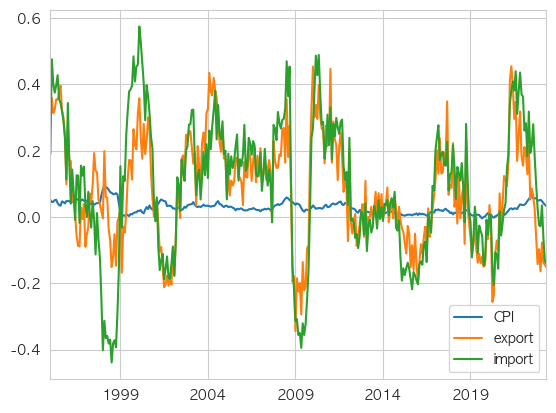

In [35]:
df.iloc[:,:3].plot()

<AxesSubplot:>

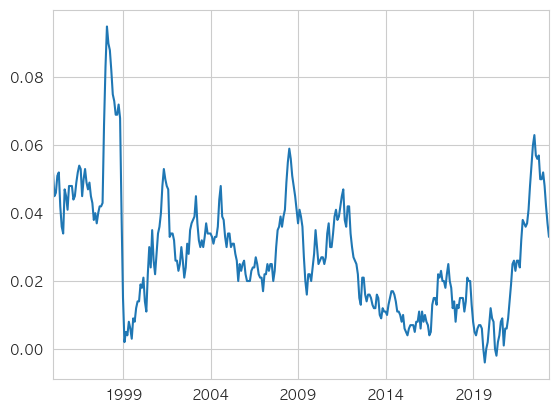

In [36]:
df.CPI.plot()

In [40]:
df.to_csv('Labeling.csv',sep=',')

In [15]:
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from pykrx import stock
import FinanceDataReader as fdr

def get_business_day(df, year, month, index=0):
    str_month = f"{year}-{month}"
    return df.loc[str_month].index[index]

df = fdr.DataReader(symbol='KS11')
get_business_day(df, 2002, 1, 0)

Timestamp('2002-01-01 00:00:00')

In [16]:
def momentum(df, year=2010, month=1, period=12):
    # 투자 시작일, 종료일
    str_day = f"{year}-{month}-01"
    start = datetime.datetime.strptime(str_day, "%Y-%m-%d")
    end = start + relativedelta(months=period-1)
    inv_start = get_business_day(df, start.year, start.month, 0)   # 첫 번째 거래일의 종가
    inv_end = get_business_day(df, end.year, end.month, -1)
    inv_start = inv_start.strftime("%Y%m%d")
    inv_end = inv_end.strftime("%Y%m%d")
    #print(inv_start, inv_end)

    # 모멘텀 계산 시작일, 종료일
    end = start - relativedelta(months=1)     # 역추세 1개월 제외
    start = start - relativedelta(months=12)
    mom_start = get_business_day(df, start.year, start.month, 0)   # 첫 번째 거래일의 종가
    mom_end = get_business_day(df, end.year, end.month, -1)
    mom_start = mom_start.strftime("%Y%m%d")
    mom_end = mom_end.strftime("%Y%m%d")
    print(mom_start, mom_end, " | ", inv_start, inv_end)

    # momentum 계산
    df1 = stock.get_market_ohlcv(mom_start)
    df2 = stock.get_market_ohlcv(mom_end)
    mon_df = df1.join(df2, lsuffix="l", rsuffix="r")
    mon_df['등락률'] = (mon_df['종가r'] - mon_df['종가l'])/mon_df['종가l']*100

    # 우선주 제외
    mon_df = mon_df.filter(regex="0$", axis=0)
    mon20 = mon_df.sort_values(by="등락률", ascending=False)[:20]
    #print(mon20)
    mon20 = mon20[['등락률']]

    # 투자 기간 수익률
    df3 = stock.get_market_ohlcv(inv_start)
    df4 = stock.get_market_ohlcv(inv_end)
    inv_df = df3.join(df4, lsuffix="l", rsuffix="r")
    inv_df['수익률'] = inv_df['종가r'] / inv_df['종가l']    # 수익률 = 매도가 / 매수가
    inv_df = inv_df[['수익률']]

    # join
    result_df = mon20.join(inv_df)
    result = result_df['수익률'].fillna(0).mean()
    return year, result

In [17]:
import time

year = 2010
month = 11
period = 6
total = 10

str_day = f"{year}-{month}-01"
start = datetime.datetime.strptime(str_day, "%Y-%m-%d")

data = []
for i in range(1,total+1):
    ret = momentum(df, start.year, start.month, period)
    data.append(ret)
    start += relativedelta(months=1)
    time.sleep(1)

20091102 20101029  |  20101101 20110429
20091201 20101130  |  20101201 20110531
20100104 20101230  |  20110103 20110630
20100201 20110131  |  20110201 20110729
20100302 20110228  |  20110302 20110831
20100401 20110331  |  20110401 20110930
20100503 20110429  |  20110502 20111031
20100601 20110531  |  20110601 20111130
20100701 20110630  |  20110701 20111229
20100802 20110729  |  20110801 20120131


In [18]:
data

[(2010, 1.0426344124068856),
 (2010, 1.156145523255193),
 (2011, 1.18179907243972),
 (2011, 1.0272759037889423),
 (2011, 1.1152122365276846),
 (2011, 0.8086165874381119),
 (2011, 0.7838387393311954),
 (2011, 0.7554210946971405),
 (2011, 0.6911336892687744),
 (2011, 0.7422522214139247)]

In [19]:
def momentum2(df, year=2010, month=11, period=12):
    # 투자 시작일, 종료일
    str_day = f"{year}-{month}-01"
    start = datetime.datetime.strptime(str_day, "%Y-%m-%d")
    end = start + relativedelta(months=period-1)
    inv_start = get_business_day(df, start.year, start.month, 0)   # 첫 번째 거래일의 종가
    inv_end = get_business_day(df, end.year, end.month, -1)
    inv_start = inv_start.strftime("%Y%m%d")
    inv_end = inv_end.strftime("%Y%m%d")
    #print(inv_start, inv_end)

    # 모멘텀 계산 시작일, 종료일
    end = start - relativedelta(months=2)     # 역추세 1개월 제외
    start = start - relativedelta(months=period)
    mom_start = get_business_day(df, start.year, start.month, 0)   # 첫 번째 거래일의 종가
    mom_end = get_business_day(df, end.year, end.month, -1)
    mom_start = mom_start.strftime("%Y%m%d")
    mom_end = mom_end.strftime("%Y%m%d")
    print(mom_start, mom_end, " | ", inv_start, inv_end)

    # momentum 계산
    df1 = stock.get_market_ohlcv(mom_start)
    df2 = stock.get_market_ohlcv(mom_end)
    mon_df = df1.join(df2, lsuffix="l", rsuffix="r")
    mon_df['등락률'] = (mon_df['종가r'] - mon_df['종가l'])/mon_df['종가l']*100

    # 우선주 제외
    mon_df = mon_df.filter(regex="0$", axis=0)
    mon20 = mon_df.sort_values(by="등락률", ascending=False)[:20]
    mon20 = mon20[['등락률']]

    # 투자 기간 수익률
    df3 = stock.get_market_ohlcv(inv_start)
    df4 = stock.get_market_ohlcv(inv_end)
    inv_df = df3.join(df4, lsuffix="l", rsuffix="r")
    inv_df['수익률'] = inv_df['종가r'] / inv_df['종가l']    # 수익률 = 매도가 / 매수가
    inv_df = inv_df[['수익률']]

    # join
    result_df = mon20.join(inv_df)
    result = result_df['수익률'].fillna(0).mean()
    return year, result

In [20]:
year = 2010
month = 11
period = 6
total = 12

str_day = f"{year}-{month}-01"
start = datetime.datetime.strptime(str_day, "%Y-%m-%d")

data = []
for i in range(1,total+1):
    ret = momentum2(df, start.year, start.month, period)
    data.append(ret)
    start += relativedelta(years=1)
    time.sleep(1)

20100503 20100930  |  20101101 20110429
20110502 20110930  |  20111101 20120430
20120502 20120928  |  20121101 20130430
20130502 20130930  |  20131101 20140430
20140502 20140930  |  20141103 20150430
20150504 20150930  |  20151102 20160429
20160502 20160930  |  20161101 20170428
20170502 20170929  |  20171101 20180430
20180502 20180928  |  20181101 20190430
20190502 20190930  |  20191101 20200429
20200504 20200929  |  20201102 20210430
20210503 20210930  |  20211101 20220429


In [21]:
data

[(2010, 1.06956194112967),
 (2011, 0.9607535438798692),
 (2012, 1.4577543978916438),
 (2013, 1.076926167292763),
 (2014, 1.6950272211482353),
 (2015, 0.9574101694987929),
 (2016, 0.9057471928263879),
 (2017, 1.3873152308101184),
 (2018, 1.0123607433408783),
 (2019, 0.7643145979893636),
 (2020, 1.1151789381829516),
 (2021, 0.9088089091211803)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/3414042650.py:32: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/3414042650.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/3414042650.py:32: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/3414042650.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/3414042650.py:32: UserWarning: Glyph 51088 (\N{HAN

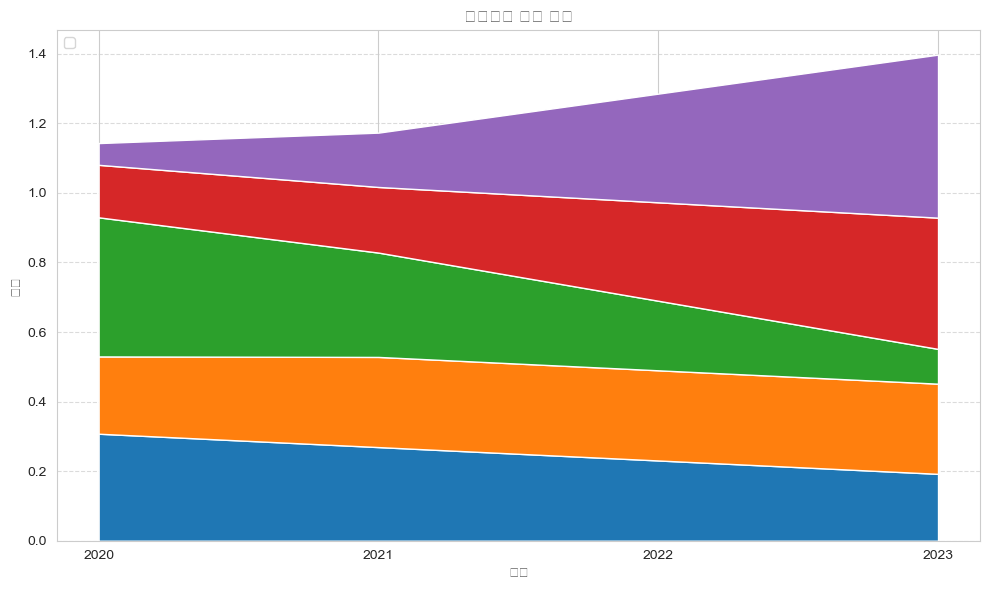

In [4]:
import matplotlib.pyplot as plt

# 가상의 데이터 (예시)
asset_classes = ['주식', '채권', '현금', '부동산', '기타']
years = [2020, 2021, 2022, 2023]
weights = {
    '주식': [0.4, 0.35, 0.3, 0.25],
    '채권': [0.3, 0.35, 0.35, 0.35],
    '현금': [0.2, 0.15, 0.1, 0.05],
    '부동산': [0.08, 0.1, 0.15, 0.2],
    '기타': [0.02, 0.05, 0.1, 0.15]
}

# 각 연도별 자산군의 비중을 정규화하여 총합이 1이 되도록 조정
for asset in asset_classes:
    total_weight = sum(weights[asset])
    weights[asset] = [w / total_weight for w in weights[asset]]

# area plot 생성
plt.figure(figsize=(10, 6))
plt.stackplot(years, [weights[asset] for asset in asset_classes], baseline='zero')

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('비중')
plt.title('자산군별 비중 변화')
plt.legend(loc='upper left')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 출력
plt.tight_layout()
plt.show()


/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/1767047061.py:29: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/1767047061.py:29: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/1767047061.py:29: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/1767047061.py:29: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/1767047061.py:29: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_31939/1767047061.py:29: UserWarn

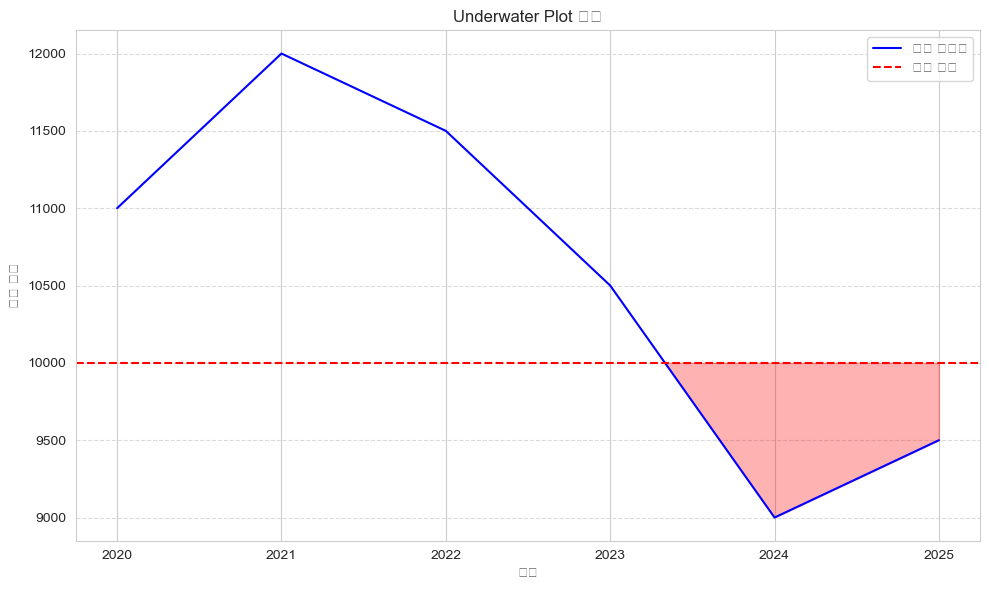

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 가상의 데이터 (예시)
years = [2020, 2021, 2022, 2023, 2024, 2025]
investment = 10000
cumulative_returns = [0.1, 0.2, 0.15, 0.05, -0.1, -0.05]

# 누적 수익률 계산
cumulative_values = [investment * (1 + r) for r in cumulative_returns]

# 데이터프레임 생성
df = pd.DataFrame({'Year': years, 'Cumulative Value': cumulative_values})

# underwater plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Cumulative Value'], label='누적 수익률', color='blue')
plt.axhline(y=investment, linestyle='--', color='red', label='투자 원금')
plt.fill_between(df['Year'], df['Cumulative Value'], investment, where=(df['Cumulative Value'] < investment), interpolate=True, color='red', alpha=0.3)

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('누적 가치')
plt.title('Underwater Plot 예시')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 출력
plt.tight_layout()
plt.show()


In [6]:
def calculate_mdd(returns):
    max_value = 0
    mdd = 0

    for r in returns:
        max_value = max(max_value, r)
        drawdown = max_value - r
        mdd = max(mdd, drawdown)

    return mdd

# 가상의 데이터 (예시)
returns = [0.1, 0.2, 0.15, 0.05, -0.1, -0.05]

# MDD 계산
mdd = calculate_mdd(returns)
print("MDD:", mdd)

MDD: 0.30000000000000004
